# Required libraries
*The fundamental libraries required to carry out the EDA*

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use('ggplot')
rcParams['figure.figsize'] = (12, 6)

# Importing the data
*The starting point of the data analysis pipeline*

In [2]:
path = '../../Data/Dataset_TargetVariables/cannai_disease_dataset.csv'
disease_df = pd.read_csv(path)

# Understanding the big picture
*Understand what we are looking at, but without going into detail*

In [3]:
# A look into the first lines of our dataset to have an overview of what we're dealing with.
disease_df.head(3)

,CropCycle,RId,Name,Date,Day_cycle,sun_time,PAR,DailyLightIntegral,T_min,T_mean,...,Permittivity_mean,RawEC_median,VolumeWaterContent_min,VolumeWaterContent_mean,VolumeWaterContent_max,BulkEC_median,PoreWaterEC_min,PoreWaterEC_mean,PoreWaterEC_max,Disease
0,1,16040987,Sonda 1,2021-07-28,1,12.291944,1052.274563,262314157.0,16.75,26.495946,...,6.42,70.769884,0.070,0.144805,0.327,7.076988,0.0,145.511197,485.1,0
1,1,15998911,Sonda 1,2021-07-28,1,12.167222,966.344766,38190525.0,17.95,28.435435,...,6.20,117.781567,0.000,0.124374,0.411,11.778157,0.0,150.879028,759.2,0
2,1,15998911,Sonda 2,2021-07-28,1,12.167222,966.344766,38190525.0,17.95,28.435435,...,4.79,37.929608,0.034,0.102315,0.210,3.792961,0.0,68.833454,306.0,0


In [4]:
# The dimensionality of our dataset (number of rows and columns)
disease_df.shape

(1560, 30)

In [5]:
# Some descriptive information about the dataset, the data type, non-null values and memory usage.
disease_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CropCycle,1560.0,2.310256e+00,7.435141e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
RId,1560.0,7.228850e+07,6.839066e+07,1.599891e+07,1.599891e+07,1.604099e+07,1.553555e+08,1.553556e+08
Day_cycle,1560.0,4.651346e+01,3.277517e+01,1.000000e+00,2.100000e+01,4.200000e+01,6.200000e+01,1.370000e+02
sun_time,1560.0,1.285923e+01,2.650584e+00,9.602778e-01,1.194444e+01,1.203083e+01,1.283528e+01,2.394111e+01
PAR,1560.0,2.154799e+02,1.795306e+02,6.354177e-01,1.088047e+02,1.649396e+02,2.275735e+02,1.052275e+03
DailyLightIntegral,1560.0,1.098009e+07,1.628073e+07,0.000000e+00,4.603251e+06,7.171736e+06,1.227486e+07,2.623142e+08
T_min,1560.0,1.966064e+01,4.191163e+00,7.100000e+00,1.666000e+01,2.028500e+01,2.342000e+01,2.594000e+01
T_mean,1560.0,2.354635e+01,2.929626e+00,1.433348e+01,2.204702e+01,2.450951e+01,2.543802e+01,3.251138e+01
T_max,1560.0,2.842914e+01,5.000063e+00,1.753000e+01,2.561000e+01,2.660000e+01,2.962250e+01,4.890000e+01
R_H_min,1560.0,5.227213e+01,1.618646e+01,1.000000e+01,4.000000e+01,5.800000e+01,6.518000e+01,8.000000e+01


In [6]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CropCycle                  1560 non-null   int64  
 1   RId                        1560 non-null   int64  
 2   Name                       1560 non-null   object 
 3   Date                       1560 non-null   object 
 4   Day_cycle                  1560 non-null   int64  
 5   sun_time                   1560 non-null   float64
 6   PAR                        1560 non-null   float64
 7   DailyLightIntegral         1560 non-null   float64
 8   T_min                      1560 non-null   float64
 9   T_mean                     1560 non-null   float64
 10  T_max                      1560 non-null   float64
 11  R_H_min                    1560 non-null   float64
 12  RH_mean                    1560 non-null   float64
 13  RH_max                     1560 non-null   float

We have a dataset of **1,560 observations** and **30 variables**, **23** of which are of type **float**.

In [7]:
(disease_df.isna().sum() == 0).all()

True

There's no missing value in the dataset.

In [8]:
disease_df.Disease.unique()

array([0, 1], dtype=int64)

The target variable (Disease) is a numerical categorical variable that covers the values of 0 and 1.

# Preparating the data
*Cleaning the dataset in order to continue the analysis*

Given the context of our work, which is that of a doctoral thesis for which a minimum of data preparation work has been done, and according to the variables' description file (Brief summary of the variables.pdf) that we have scrupulously gone through:

- No variable is to be deleted (a priori)

- The nomenclature is simple and makes sense, but there's a little mistake to correct; we're going to change **R_H_min** to **RH_min**, so that this new name fits with the two variables **RH_mean** and **RH_max**.

In [9]:
disease_df.rename(columns={'R_H_min': "RH_min"}, inplace=True)

In [10]:
disease_df.duplicated().sum()

0

- There are no duplicated rows 

In [11]:
# Parsing the Date column into a datetime object
disease_df.Date = pd.to_datetime(disease_df.Date, format='%Y-%m-%d')

Many of the variables in the dataset (almost numeric variables) exists in 3 different aspects: \[variable\]_min, \[variable\]_mean & \[variable\]_max. Here we want to check if the statement:
$$
[variable]\_min \le [variable]\_mean \le [variable]\_max
$$
is always verified.

In [12]:
import re
string = ' '.join(disease_df.columns)
pattern = '\w*_min'
min_variables = re.findall(pattern, string)
min_variables

['T_min',
 'RH_min',
 'VaporPressureDeficit_min',
 'SoilTemperature_min',
 'VolumeWaterContent_min',
 'PoreWaterEC_min']

There are 6 of such variables.

In [13]:
radicals = [variable[:-3] for variable in min_variables] # delete the 'min' suffix

mean_variables, max_variables = ([radical + 'mean' for radical in radicals], # adding 'mean' &
                                 [radical + 'max' for radical in radicals])  # 'max' suffixes

In [14]:
result = [((disease_df[min_variables[i]] <= disease_df[mean_variables[i]]) &
           (disease_df[mean_variables[i]] <= disease_df[max_variables[i]])).all()
          for i in range(len(min_variables))]
all(result)

True

The inequality is always verified.

The variables description file suggests the creation of three (min, mean,  max) categorical variables along with **VaporPressureDeficit_** values, since some indicative ranges are given.

In [15]:
# Min
disease_df.loc[disease_df.VaporPressureDeficit_min < .4, 'VPD_state_min'] = 'Saturated atmosphere'
disease_df.loc[(.4 <= disease_df.VaporPressureDeficit_min) &
               (disease_df.VaporPressureDeficit_min < 1.6), 'VPD_state_min'] = 'Optimal VPD'
disease_df.loc[1.6 <= disease_df.VaporPressureDeficit_min, 'VPD_state_min'] = 'Excessive transpiration'

# Mean
disease_df.loc[disease_df.VaporPressureDeficit_mean < .4, 'VPD_state_mean'] = 'Saturated atmosphere'
disease_df.loc[(.4 <= disease_df.VaporPressureDeficit_mean) &
               (disease_df.VaporPressureDeficit_mean < 1.6), 'VPD_state_mean'] = 'Optimal VPD'
disease_df.loc[1.6 <= disease_df.VaporPressureDeficit_mean, 'VPD_state_mean'] = 'Excessive transpiration'

# Max
disease_df.loc[disease_df.VaporPressureDeficit_max < .4, 'VPD_state_max'] = 'Saturated atmosphere'
disease_df.loc[(.4 <= disease_df.VaporPressureDeficit_max) &
               (disease_df.VaporPressureDeficit_max < 1.6), 'VPD_state_max'] = 'Optimal VPD'
disease_df.loc[1.6 <= disease_df.VaporPressureDeficit_max, 'VPD_state_max'] = 'Excessive transpiration'

# Understanding the variables
*Univariate analysis & relationship between variables*

## Categorical variables
*They are: CropCycle, RId, Name, VPD_[min, mean, max] & Disease*

### Univariate analysis

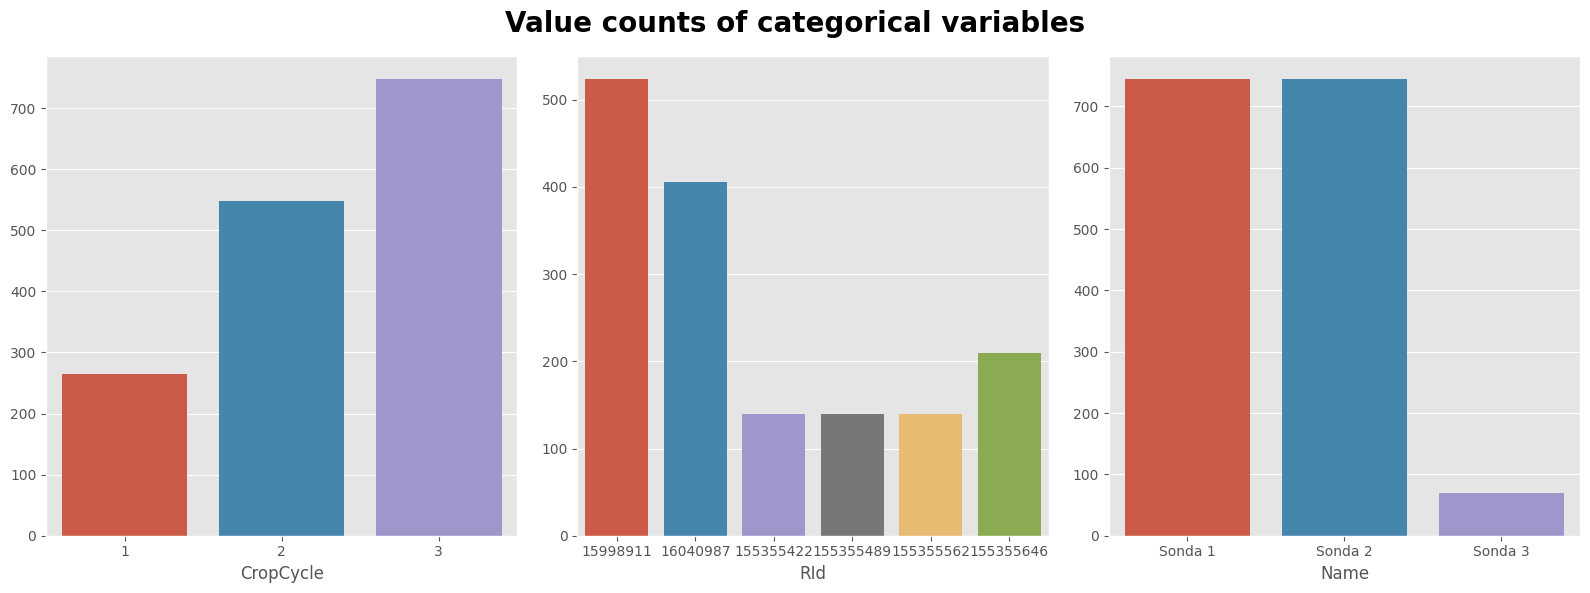

In [16]:
cat_vars = ['CropCycle', 'RId', 'Name']

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
[(sns.countplot(data=disease_df, x=cat_vars[i], ax=ax[i]), ax[i].set_ylabel(''))
 for i in range(3)]

plt.suptitle('Value counts of categorical variables', fontsize=20, fontweight=600)
plt.tight_layout()
plt.savefig('value_counts_of_categorical_variables.png')
plt.show()

In [17]:
# Percentage of data in each crop cycle
round(disease_df.CropCycle.value_counts(normalize=True) * 100, 2)

3    47.95
2    35.13
1    16.92
Name: CropCycle, dtype: float64

In [18]:
# Understanding the RId and probes' distributions
disease_df.groupby('Name').RId.value_counts()

Name     RId      
Sonda 1  15998911     262
         16040987     203
         155355422     70
         155355489     70
         155355562     70
         155355646     70
Sonda 2  15998911     262
         16040987     203
         155355422     70
         155355489     70
         155355562     70
         155355646     70
Sonda 3  155355646     70
Name: RId, dtype: int64

- The amount of data collected increases at each crop cycle; about $\frac{1}{6}$ of the entire data was collected during the first crop cycle, $\frac{1}{3}$ during the second one, and the rest ($\approx \frac{1}{2}$) of the data belongs to the third crop cycle
- A total number of 6 devices were used to measure the different parameters. Two of them were more sollicited than the others
- The device no 155355646 was the only one to be equiped of 3 probes, while the 5 others had 2 ones each, that's why Sonda (probe) 3 doesn't have so much observations

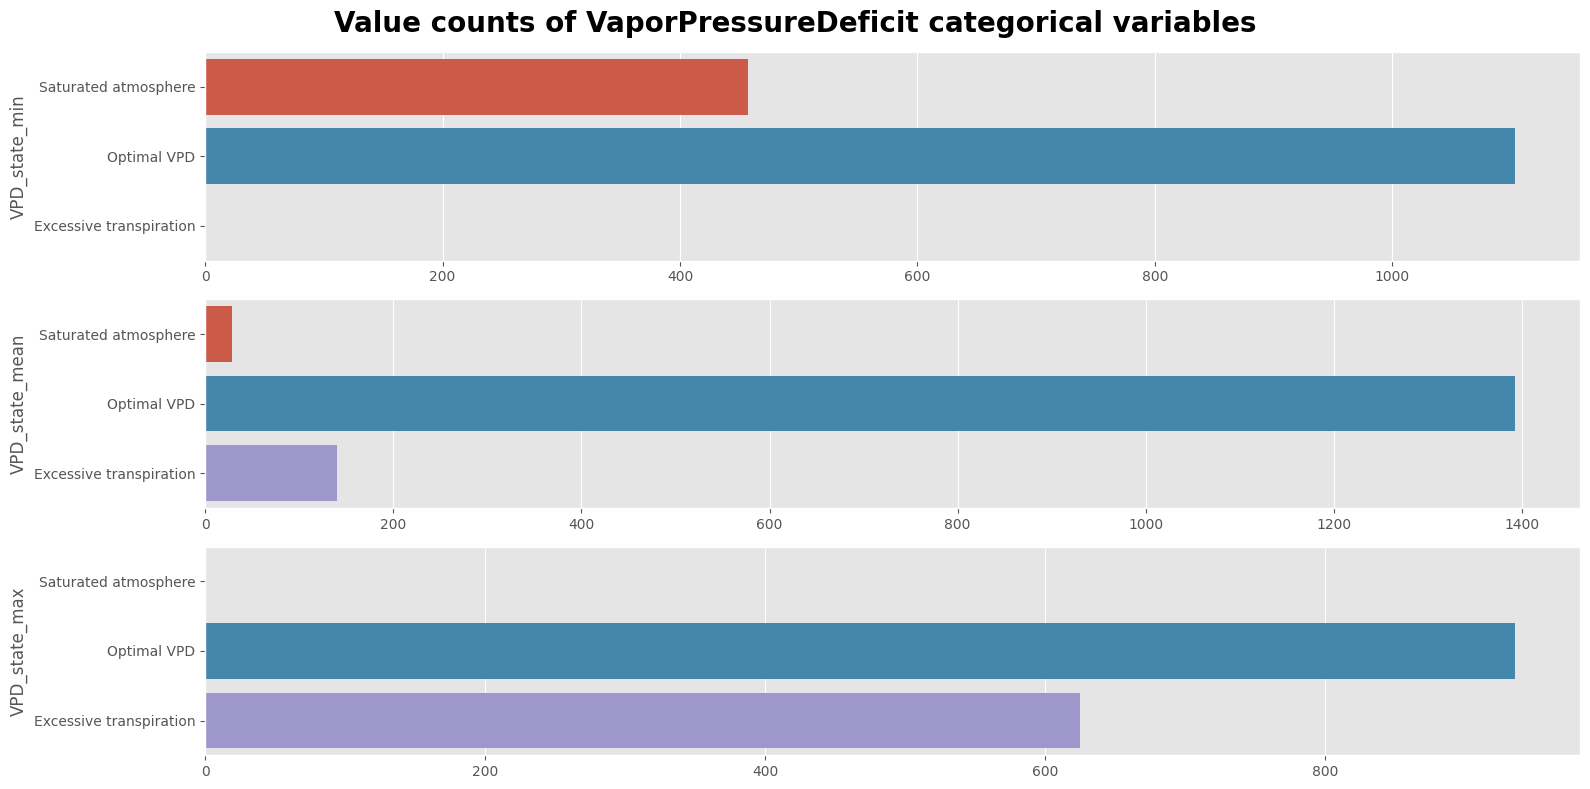

In [19]:
VPD_cat_vars = ['VPD_state_min', 'VPD_state_mean', 'VPD_state_max']

fig, ax = plt.subplots(3, 1, figsize=(16, 8))
order = ['Saturated atmosphere', 'Optimal VPD', 'Excessive transpiration']
[(sns.countplot(data=disease_df, y=VPD_cat_vars[i], ax=ax[i], order=order),
  ax[i].set_xlabel('')) for i in range(3)]

plt.suptitle('Value counts of VaporPressureDeficit categorical variables', fontsize=20, fontweight=600)
plt.tight_layout()
plt.savefig('value_counts_of_vaporpressuredeficit_categorical_variables.png')
plt.show()

In [20]:
# VaporPressureDeficit state distributions
(round(disease_df.VPD_state_min.value_counts(normalize=True) * 100, 2), '',
 round(disease_df.VPD_state_max.value_counts(normalize=True) * 100, 2))

(Optimal VPD             70.71
 Saturated atmosphere    29.29
 Name: VPD_state_min, dtype: float64,
 '',
 Optimal VPD                59.94
 Excessive transpiration    40.06
 Name: VPD_state_max, dtype: float64)

Globally, the VaporPressureDeficit falls within the optimal range, despite the fact that 29.29% of minimum values are below the lower bound of 0.4 (saturated atmosphere), and 40.06% of the maximum ones are above the upper bound of 1.6 (excessive transpiration).

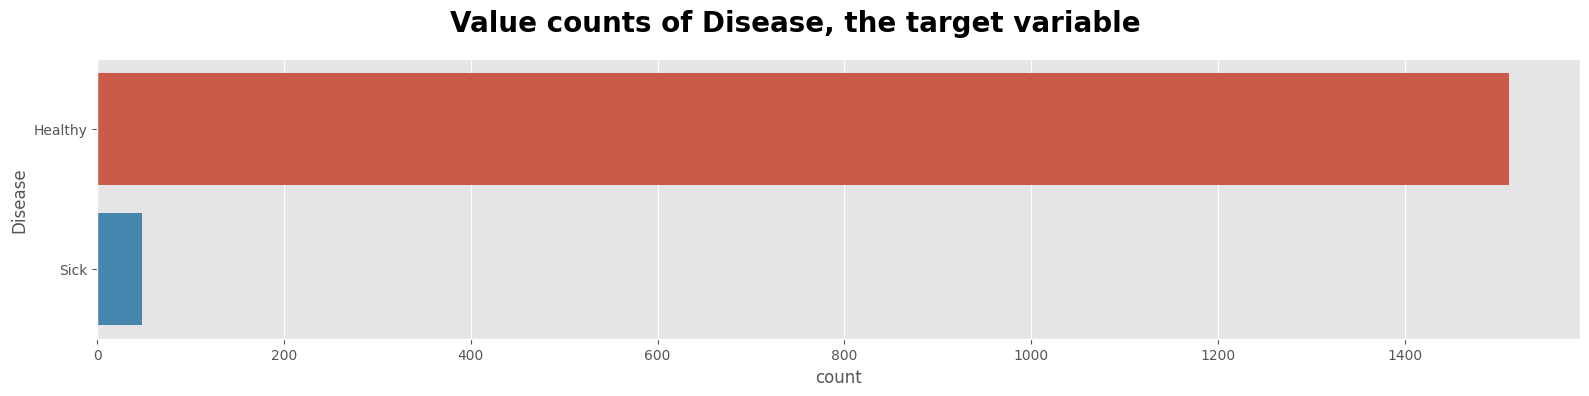

In [21]:
fig, ax = plt.subplots(figsize=(16, 4))
g = sns.countplot(data=disease_df.sort_values('Disease'), y='Disease')
g.set_yticklabels(['Healthy', 'Sick'])

plt.suptitle('Value counts of Disease, the target variable', fontsize=20, fontweight=600)
plt.tight_layout()
plt.savefig('value_counts_of_disease_the_target_variable.png')
plt.show()

In [22]:
# Percentage of sick and healthy plants
round(disease_df.Disease.value_counts(normalize=True) * 100, 2)

0    96.92
1     3.08
Name: Disease, dtype: float64

The target variable is really unbalanced with 96.08% of the plants declared healthy and only 3.08% of sick plants.

### Multivariate analysis

In [23]:
# Ordering RId by descending number of occurences
order = disease_df.RId.value_counts().sort_values(ascending=False).index
disease_df['RId'] = pd.Categorical(disease_df['RId'], categories=order, ordered=True)

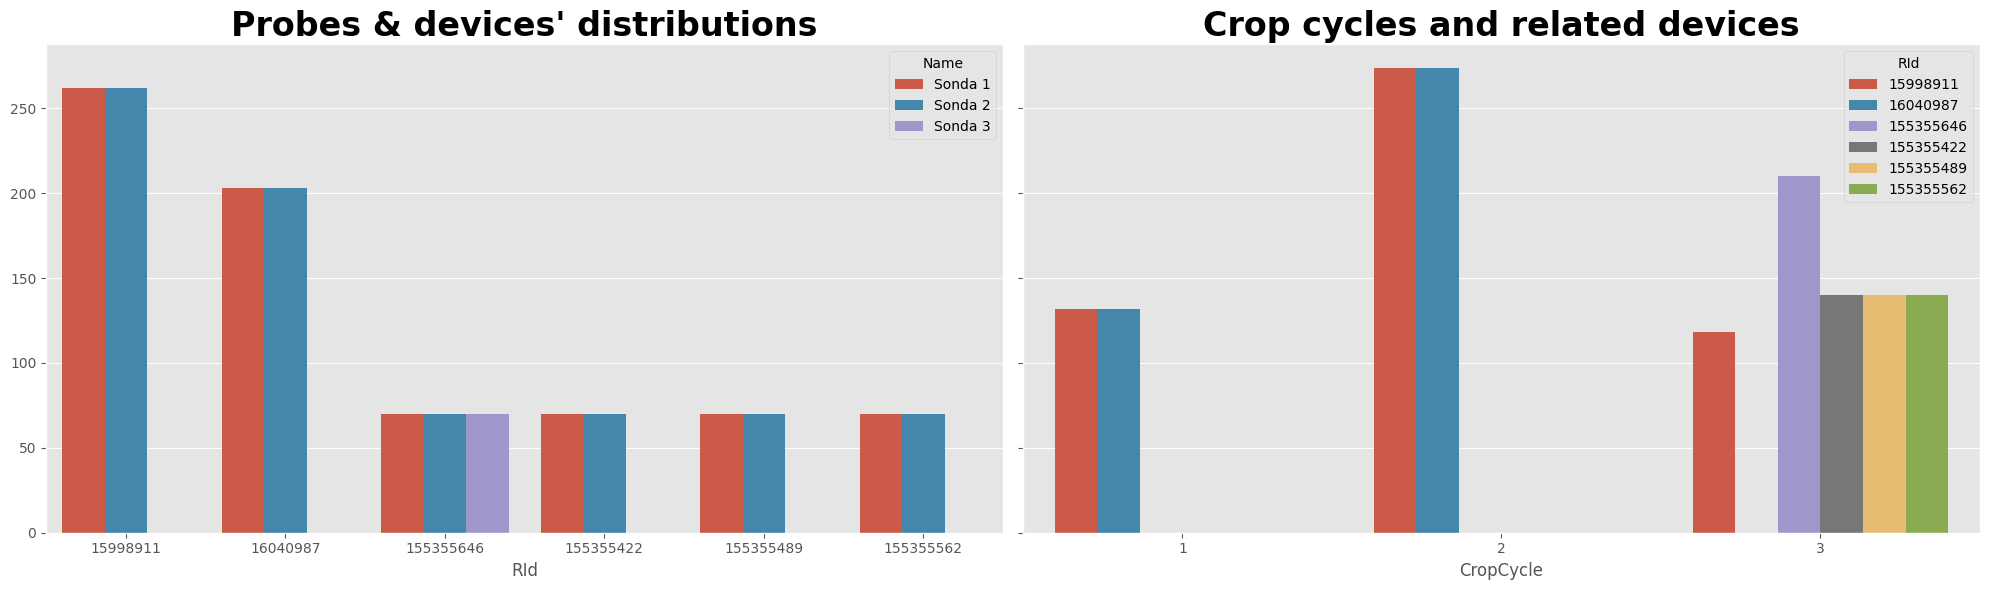

In [24]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 6))

x = disease_df.groupby(['RId', 'Name'])['Disease'].count().reset_index(name='Count')
g = sns.barplot(data=x.sort_values('RId'), x='RId', y='Count', hue='Name', ax=ax[0])
g.set_ylabel('')
g.set_title('Probes & devices\' distributions', fontsize=24, fontweight=600)

x = disease_df.groupby(['RId', 'CropCycle'])['Disease'].count().reset_index(name='Count')
g = sns.barplot(data=x.sort_values('CropCycle'), x='CropCycle', y='Count', hue='RId', ax=ax[1])
g.set_ylabel('')
g.set_title('Crop cycles and related devices', fontsize=24, fontweight=600)

plt.tight_layout()
plt.savefig('relationship_between_devices_probes_and_crop_cycles.png')
plt.show()

- All probes of a single device collect data at the same time, that's why within a group, the bars are of equal lengths
- The same devices were used during cycles 1 and 2 and there were 2 of them (16040987 and 159989911). The third cycle for its part required 5 devices.

In [25]:
## Getting each CropCycle start and end date, then duration to label our plot
from datetime import datetime
CropCycle_bounds = [disease_df.groupby('CropCycle').get_group(CropCycle)['Date'].iloc[[0, -1]].tolist()
                    for CropCycle in disease_df.CropCycle.unique()]
labels = ['Cycle ' + str(i+1) + ' (' +
          str((CropCycle_bound[1] - CropCycle_bound[0]).days + 1) +
          ' days)\n' + str(CropCycle_bound[0])[:10] + ' to ' + str(CropCycle_bound[1])[:10]
          for i, CropCycle_bound in enumerate(CropCycle_bounds)]


In [26]:
labels

['Cycle 1 (66 days)\n2021-07-28 to 2021-10-01',
 'Cycle 2 (137 days)\n2021-10-04 to 2022-02-17',
 'Cycle 3 (70 days)\n2022-07-27 to 2022-10-04']

In [27]:
def get_color(color, alpha=1):
    try:
        assert color in ['blue', 'red', 'purple'] and 0 <= alpha <= 1
    except AssertionError:
        print('Invalid values of color or/and alpha')
        return
    
    if color == 'blue': return [68/255, 131/255, 171/255, alpha]
    if color == 'red': return [204/255, 92/255, 76/255, alpha]
    if color == 'purple': return [154/255, 147/255, 201/255, alpha]

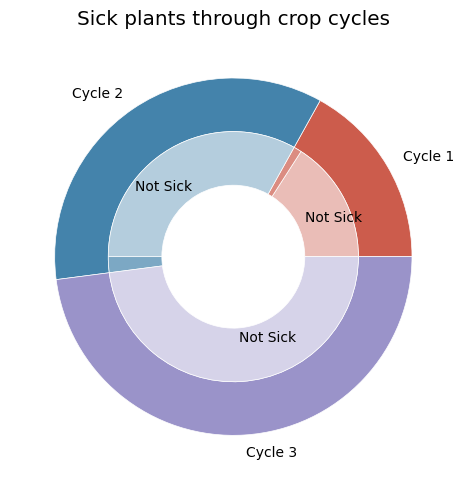

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))
size = .3
outer_colors = np.array([get_color('red'), get_color('blue'), get_color('purple')])
inner_colors = np.array([get_color('red', .4), get_color('red', .7),
                         get_color('blue', .4), get_color('blue', .7),
                         get_color('purple', .4), get_color('purple', .7)])
outer_labels = ['Cycle ' + str(i) for i in range(1, 4)]
inner_labels = ['Not Sick', '', 'Not Sick', '', 'Not Sick']

ax.pie(disease_df.CropCycle.value_counts().sort_index(), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=outer_labels)
ax.pie(disease_df.groupby('CropCycle').Disease.value_counts(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=inner_labels, labeldistance=.65)
ax.set(title='Sick plants through crop cycles')
plt.tight_layout()
plt.savefig('sick_plants_through_crop_cycles.png')
plt.show()

In [29]:
disease_df.Disease.value_counts(normalize=True)

0    0.969231
1    0.030769
Name: Disease, dtype: float64

Few plants are declared sick among the 1,560 in our dataset. To be more precise, there are 48 of them, which is approximately 3.08%, and the overall sick plants were found during the two first crop cycles (which we recall, only used devices 16040987 and 159989911). This result may have a serious impact on data preprocessing (train and test set splitting, data augmentation, ...)

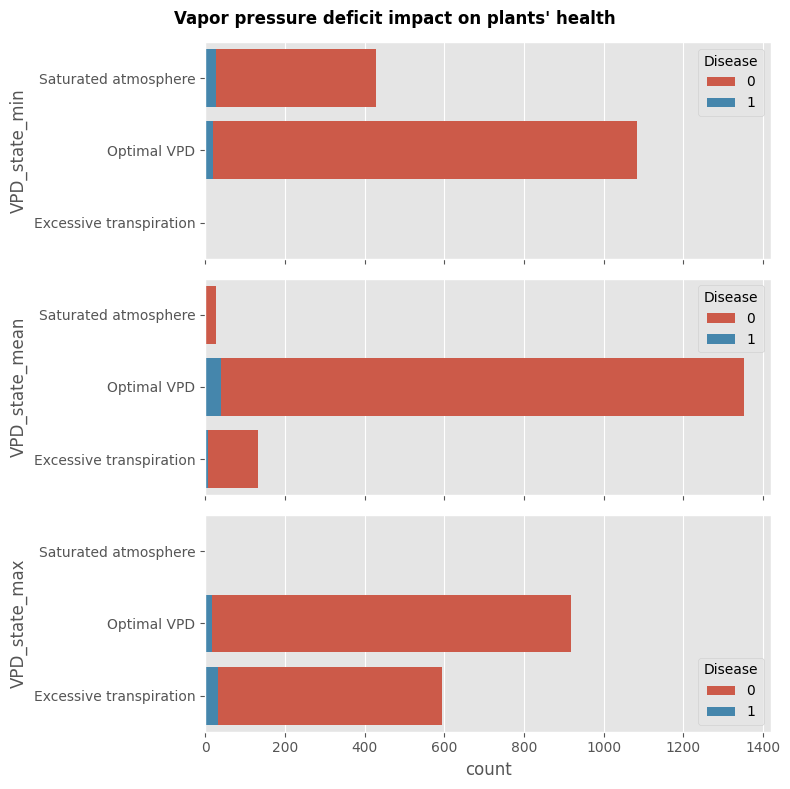

In [30]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
suffixes = ['min', 'mean', 'max']
order = ['Saturated atmosphere', 'Optimal VPD', 'Excessive transpiration']
[sns.countplot(data=disease_df, y='VPD_state_' + suffix, ax=ax[i], order=order, hue='Disease', dodge=False)
 for i, suffix in enumerate(suffixes)]
ax[0].set_xlabel(''), ax[1].set_xlabel('')

plt.suptitle('Vapor pressure deficit impact on plants\' health', fontweight=600)
plt.tight_layout()
plt.savefig('vapor_pressure_deficit_impact_on_plants_health.png')
plt.show()

It seams like the vapor pressure deficit does not influence the plants' health so much, since there's approximately the same number of deseased plants no matter the vapor pressure deficit values.

## Numerical variables
*They are: sun_time, PAR, DailyLightIntegral, T_\[min, mean, max\], RH_\[min, mean, max\], VaporPressureDeficit_\[min, mean, max\], SoilTemperature_\[min, mean, max\], Permittivity_mean, RawEC_median, VolumeWaterContent_\[min, mean, max\], BulkEC_median & PoreWaterEC_\[min, mean, max\]*

We would like to have a general idea of the correlation between the different variables to study the possibility of a features' selection.

First of all, assuming we have 6 parameters for which the min, mean and max values are given, we are going to examine the correlation between the three previous statistics for each of the parameters.

A priori, we're making the hypothesis that for each of those parameters, there's a strong correlation among the three statistics: min, mean & max. If that's the case (considering a threshold of $\pm 0.6$), we're going to select only the mean to pursue the analysis.

In [31]:
min_mean_max = ['T', 'RH', 'VaporPressureDeficit', 'SoilTemperature', 'VolumeWaterContent', 'PoreWaterEC']
mmm = np.array(min_mean_max).reshape(2, 3)
mmm

array([['T', 'RH', 'VaporPressureDeficit'],
       ['SoilTemperature', 'VolumeWaterContent', 'PoreWaterEC']],
      dtype='<U20')

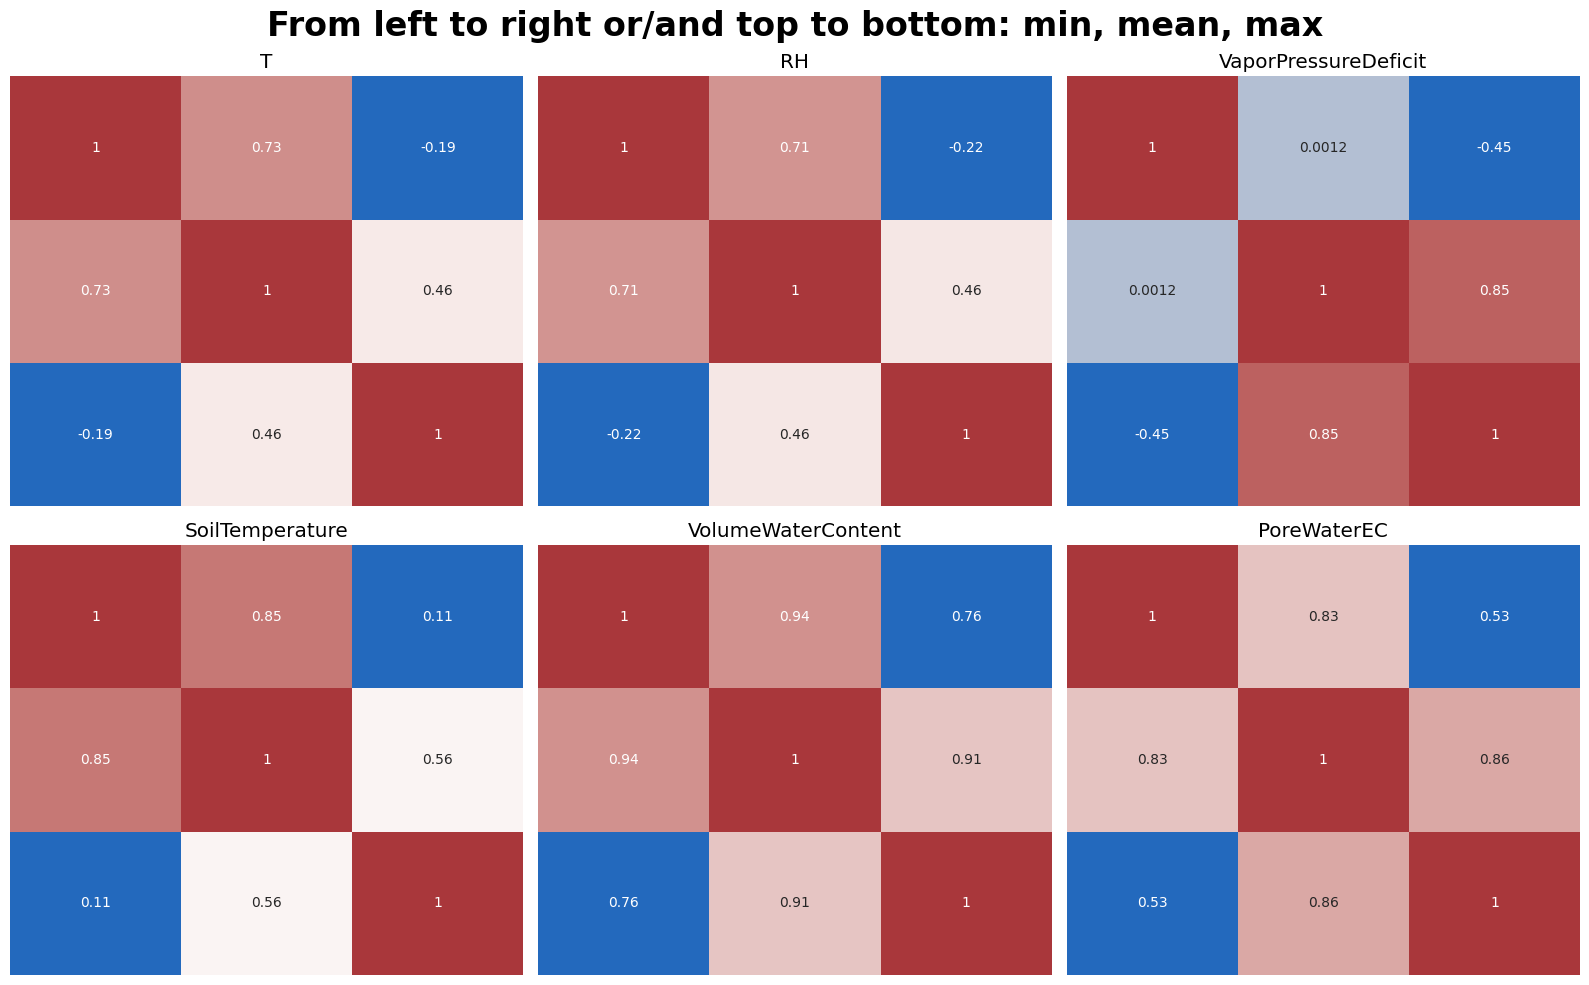

In [32]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))
[(sns.heatmap(data=disease_df[[mmm[i, j] + '_min', mmm[i, j] + '_mean', mmm[i, j] + '_max']].corr(),
              cmap='vlag', annot=True, ax=ax[i, j], cbar=False, xticklabels=[], yticklabels=[]),
  ax[i, j].title.set_text(mmm[i, j])) for i in range(2) for j in range(3)]

fig.suptitle('From left to right or/and top to bottom: min, mean, max', fontsize=24, fontweight=600)
plt.tight_layout()
plt.savefig('correlation_matrix_for_min_mean_max_variables.png')
plt.show()

Our prior hypothesis is just partially verified. Only **VolumeWaterContent** and **PoreWaterEC** fits that rule, which is not that inaccurate since for the other variables, either the minimum or the maximum value is strongly correlated to the mean. Thus, for the next analysis, we can do without: **T_min**, **RH_min**, **VaporPressureDeficit_max** and **SoilTemperature_min**, in addition to the min and max values of **VolumeWaterContent** and **PoreWaterEC**.

We're now going to observe the correlation matrix for all the variables except the ones previously cited.

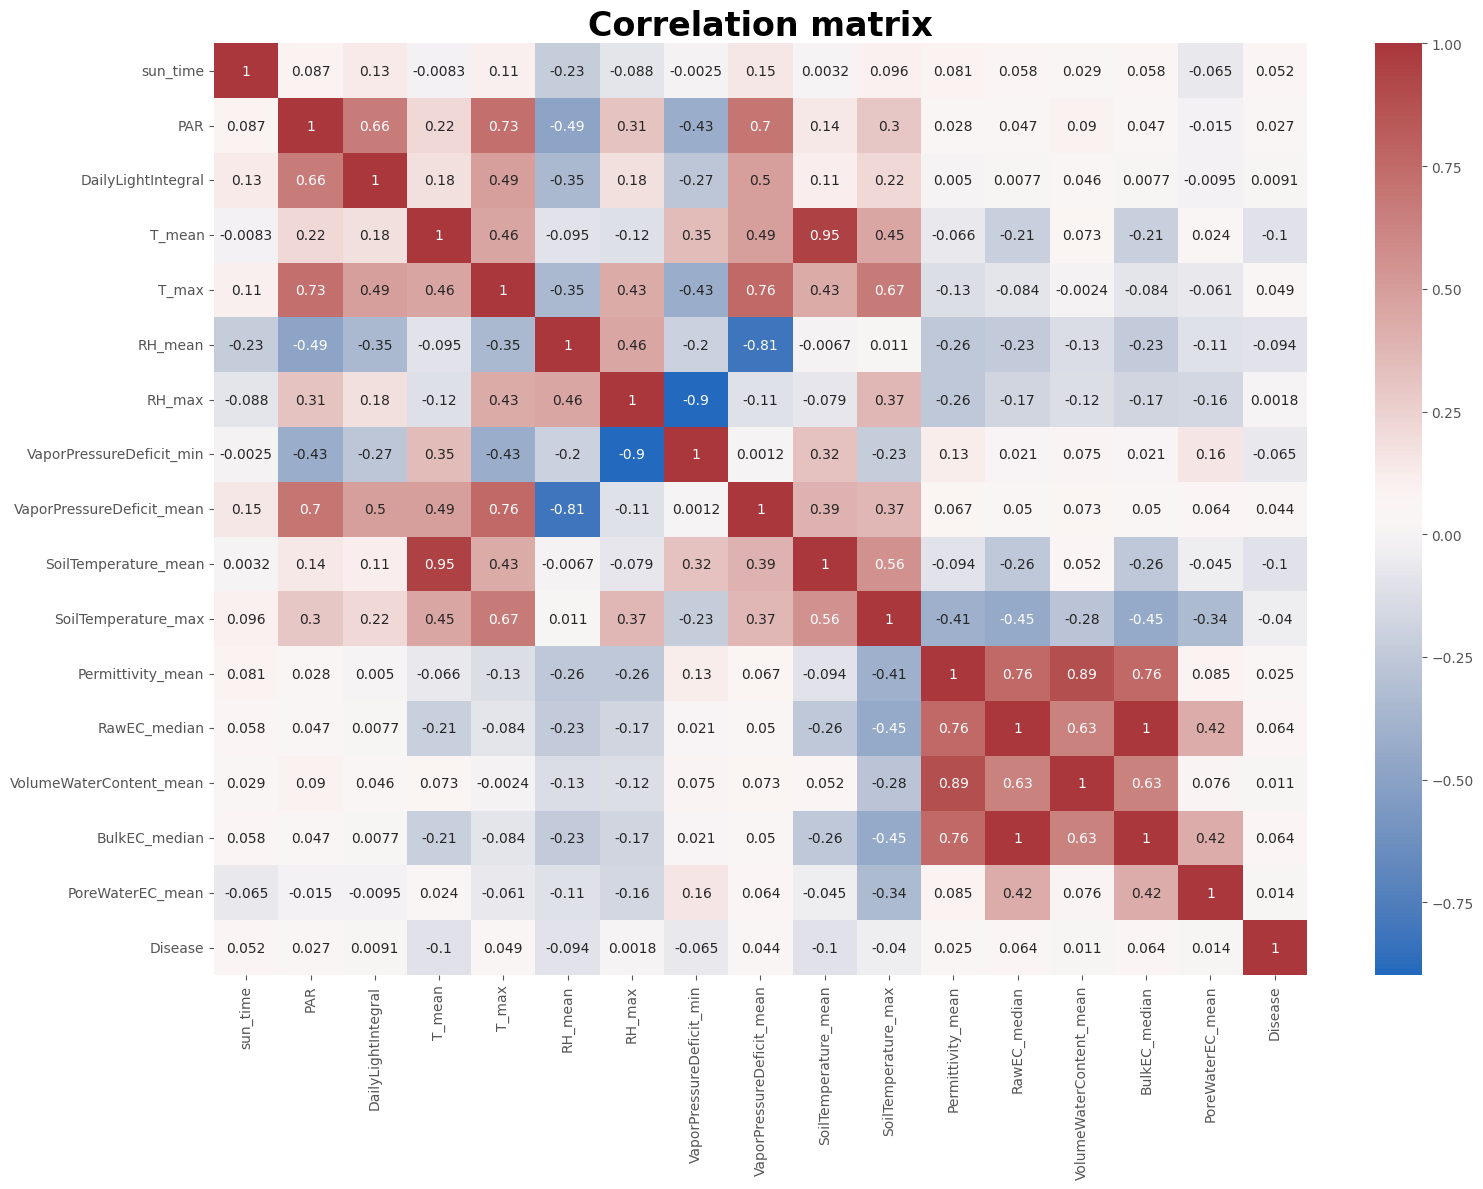

In [33]:
plt.figure(figsize=(16, 12))
sns.heatmap(data=disease_df[['sun_time', 'PAR', 'DailyLightIntegral', 'T_mean', 'T_max', 'RH_mean', 'RH_max',
                             'VaporPressureDeficit_min', 'VaporPressureDeficit_mean', 'SoilTemperature_mean',
                             'SoilTemperature_max', 'Permittivity_mean', 'RawEC_median', 'VolumeWaterContent_mean',
                             'BulkEC_median', 'PoreWaterEC_mean', 'Disease']].corr(), cmap='vlag', annot=True)

plt.title('Correlation matrix', fontsize=24, fontweight=600)
plt.tight_layout()
plt.savefig('correlation_matrix_for_all_numerical_variables.png')
plt.show()

Considering our |0.6| threshold, some other correlations appears on this figure:

- **PAR** and **DailyLightIntegral**, **T_max**, **VaporPressureDeficit_mean**
- **T_mean** and **SoilTemperature_mean** (actually, T stands for (ambient) temperature)
- **T_max** and **VaporPressureDeficit_mean**, **SoilTemperature_max**
- **RH_mean** and **VaporPressureDeficit_mean** (negative correlation)
- **RH_max** and **VaporPressureDeficit_min** (negative correlation)
- **Permittivity_mean**, **RawEC_median**, **VolumeWaterContent_mean** and **BulkEC_median** (mutual correlation, with a perfect correlation between **RawEC_** and **BulkEC_** **median**)

On this, we suggest a principal components analysis to reduce the number of features to be passed to the model for training.

Let's now visualize the marginal distributions of these numerical variables, and combine them with categorical ones. Some features are going to be selected just to have an idea. No rigorous work was carried out to pick those variables.

In [34]:
some_num_vars = ['PAR', 'DailyLightIntegral', 'T_mean', 'RH_mean', 'VolumeWaterContent_mean', 'RawEC_median']
some_num_vars = np.array(some_num_vars).reshape(3, 2)

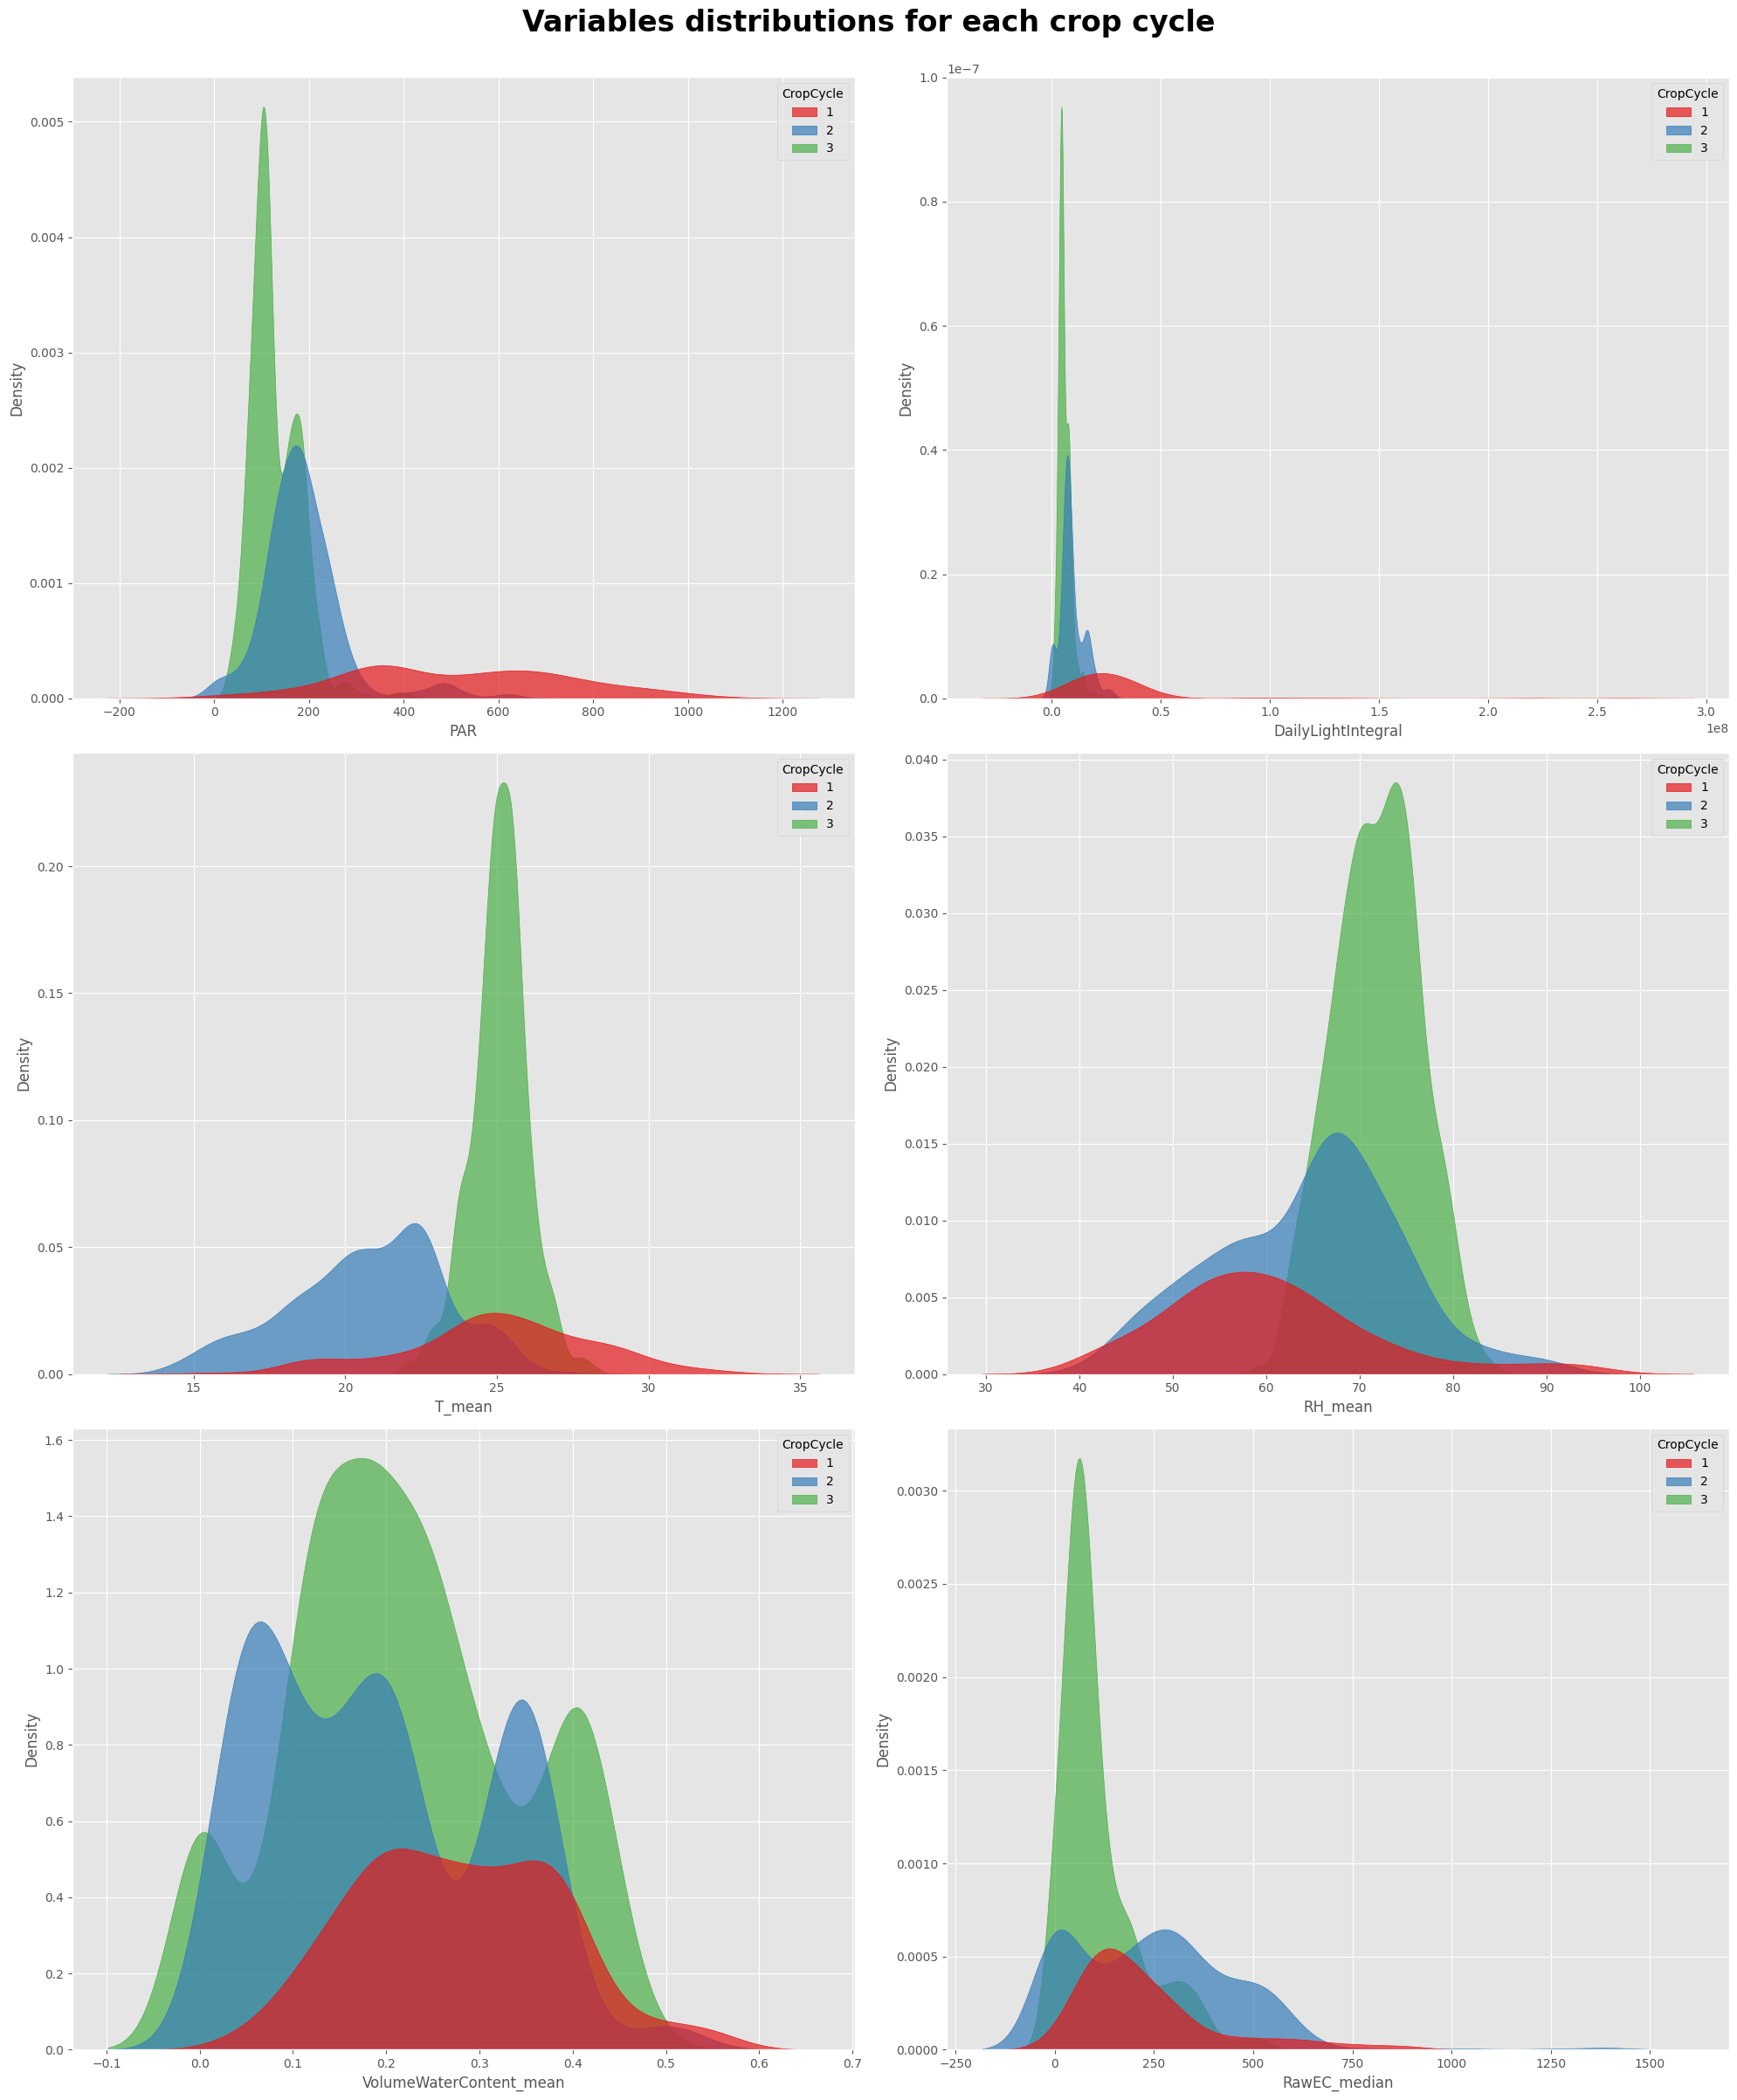

In [35]:
fig, ax = plt.subplots(3, 2, figsize=(20, 24))
[sns.kdeplot(data=disease_df, x=some_num_vars[i, j], ax=ax[i, j], hue='CropCycle', palette='Set1', fill=True, alpha=.7)
 for i in range(3) for j in range(2)]

plt.suptitle('Variables distributions for each crop cycle', y=1, fontsize=24, fontweight=600)
plt.tight_layout()
plt.savefig('variables_distributions_for_each_crop_cycle.png')
plt.show()

Globally, values for these variables are going crescendo, and are less spread as the crop cycle evolves. Combined with the fact that diseases were observed only during the two first crop cycles (nested pie chart above), we can identify range values within which plants are more likely to remain healthy.

Let's now focus on data variability in each crop cycle

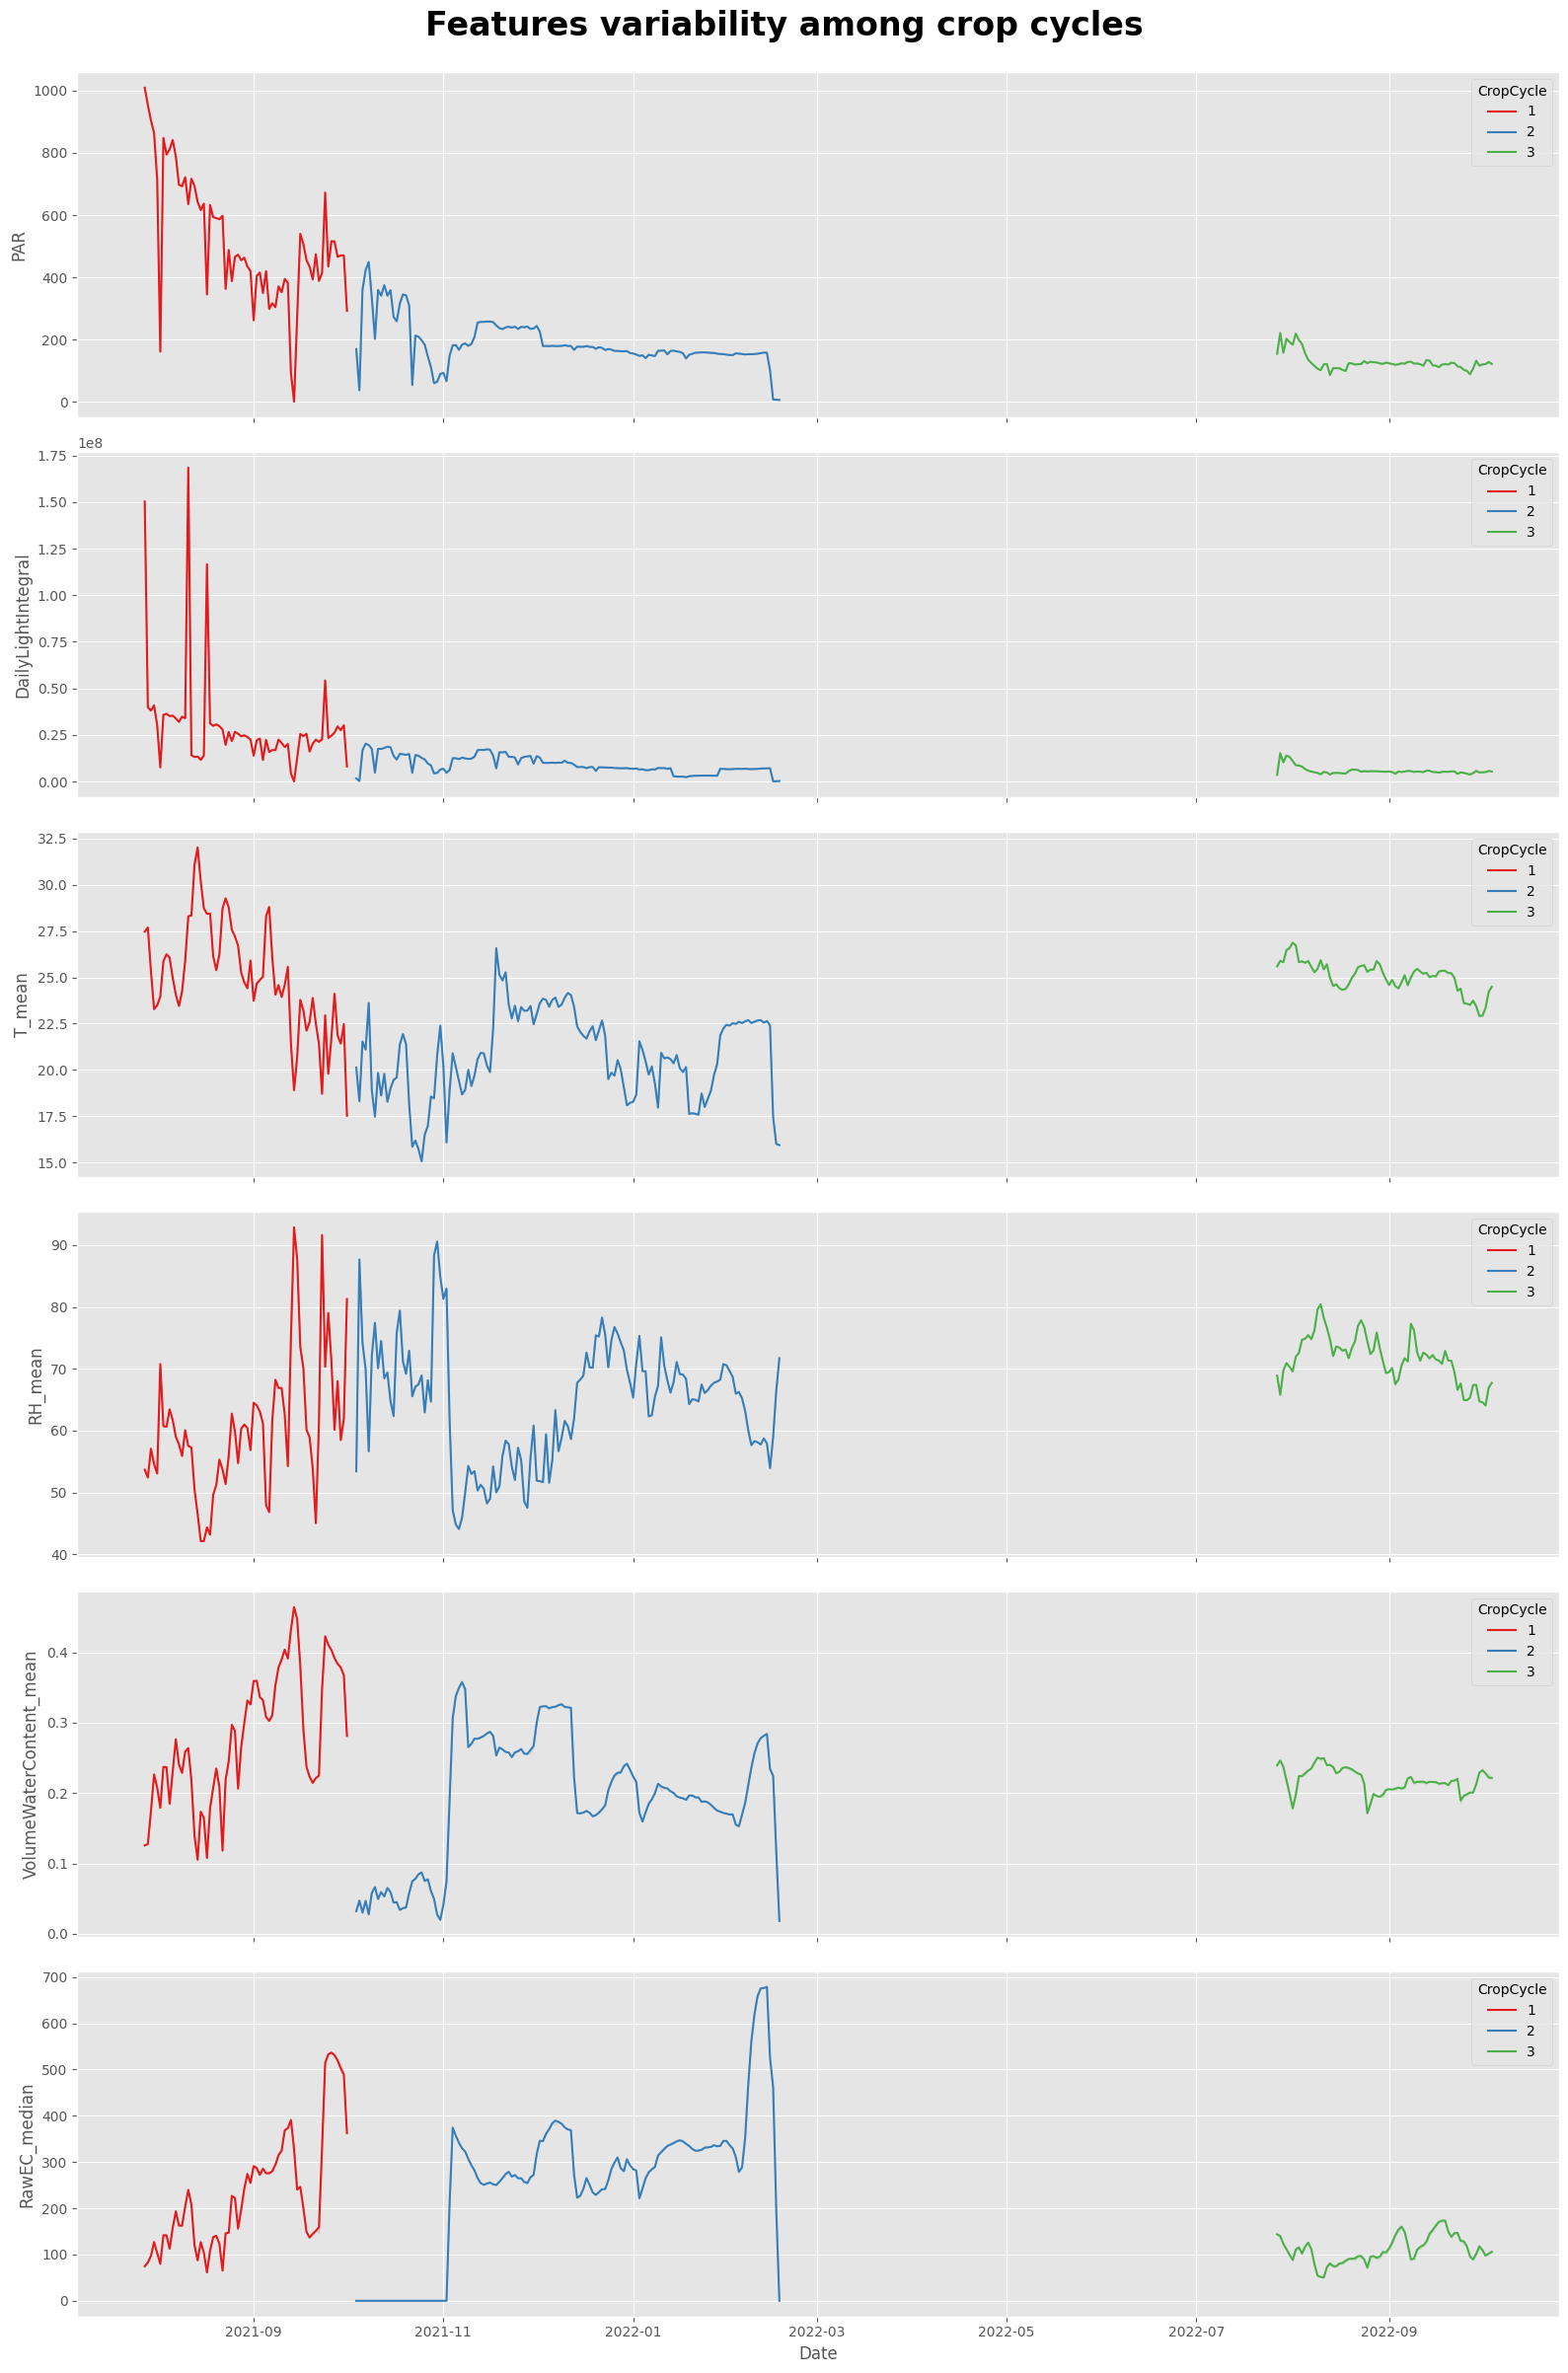

In [36]:
fig, ax = plt.subplots(6, 1, figsize=(16, 24), sharex=True)
[sns.lineplot(data=disease_df, x='Date', y=some_num_vars.flatten()[i], hue='CropCycle', ax=ax[i], palette='Set1', errorbar=('ci', False))
 for i in range(6)]

plt.suptitle('Features variability among crop cycles', y=1, fontsize=24, fontweight=600)
plt.tight_layout()
plt.savefig('features_variability_among_crop_cycles.png')
plt.show()

The third crop cycle appears to be the most stable in terms of variability. Values are very spread for the first two and tight for the latter.

The data analysis carried out in the context of the first part of this project has provided several important results. First, we deal with unbalanced data: the amount of data collected increases from one crop cycle to another either because of changes in crop cycle duration (crop cycle 1 to 2) or because the increase of the number of plants observed (crop cycle 2 to 3). The target variable is also concerned by this since 48 out of 1560 observations represent sick plants, which represents only 3% of the entire dataset. Furthermore, sick observations are found during the crop cycles 1 and 2, which parameters are very different from the the 3rd one both in terms of distribution and variance.